In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
import folium
import json
#from folium import plugins
import plotly
#import geoJSON

## Step 0

### Reading Data from 3 sources

In [3]:
raw_confirmed_case = pd.read_csv('RAW_us_confirmed_cases.csv')

mask_mandates = pd.read_csv('U.S._State_and_Territorial_Public_Mask_Mandates_From_April_10__2020_through_August_15__2021_by_County_by_Day.csv')

url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/mask-use/mask-use-by-county.csv"
mask_by_county = pd.read_csv(url)

### The next 3 cells are looking at data

In [4]:
raw_confirmed_case

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,...,9909,9910,9954,9967,10043,10047,10048,10061,10083,10219
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,...,37127,37167,37192,37224,37245,37258,37266,37285,37325,37350
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,...,3563,3565,3566,3575,3577,3578,3578,3583,3595,3596
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,...,4232,4236,4240,4246,4251,4252,4253,4256,4262,4275
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,...,10113,10132,10162,10179,10192,10197,10207,10227,10338,10364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,Wyoming,Teton,84056039,US,USA,840,56039.0,US,43.935225,-110.589080,...,5083,5098,5110,5119,5119,5119,5152,5164,5168,5185
3338,Wyoming,Uinta,84056041,US,USA,840,56041.0,US,41.287818,-110.547578,...,3733,3744,3756,3781,3781,3781,3794,3805,3814,3817
3339,Wyoming,Unassigned,84090056,US,USA,840,90056.0,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,Wyoming,Washakie,84056043,US,USA,840,56043.0,US,43.904516,-107.680187,...,1631,1645,1657,1677,1677,1677,1690,1700,1715,1719


In [5]:
mask_mandates

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
0,AL,Autauga County,1,1,4/10/2020,2,NaN,NaN,NaN,NaN
1,AL,Autauga County,1,1,4/11/2020,2,NaN,NaN,NaN,NaN
2,AL,Autauga County,1,1,4/12/2020,2,NaN,NaN,NaN,NaN
3,AL,Autauga County,1,1,4/13/2020,2,NaN,NaN,NaN,NaN
4,AL,Autauga County,1,1,4/14/2020,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1593864,VI,St. Thomas Island,78,30,8/11/2021,1,Yes,Official,NaN,"V.I. Twenty-Seventh Supp. Exec. Order (Aug. 6,..."
1593865,VI,St. Thomas Island,78,30,8/12/2021,1,Yes,Official,NaN,"V.I. Twenty-Seventh Supp. Exec. Order (Aug. 6,..."
1593866,VI,St. Thomas Island,78,30,8/13/2021,1,Yes,Official,NaN,"V.I. Twenty-Seventh Supp. Exec. Order (Aug. 6,..."
1593867,VI,St. Thomas Island,78,30,8/14/2021,1,Yes,Official,NaN,"V.I. Twenty-Seventh Supp. Exec. Order (Aug. 6,..."


In [6]:

mask_by_county

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459
...,...,...,...,...,...,...
3137,56037,0.061,0.295,0.230,0.146,0.268
3138,56039,0.095,0.157,0.160,0.247,0.340
3139,56041,0.098,0.278,0.154,0.207,0.264
3140,56043,0.204,0.155,0.069,0.285,0.287


## Step 1 
### Adjusting columns to have FIPS data combined in mask_mandates 

In [7]:
mask_mandates['fullFIPS'] = mask_mandates['FIPS_State'].astype(str) + "0" + mask_mandates['FIPS_County'].astype(str)

### The next 3 cells are isolating the County that is specific to my analysis. Miami-Dade

In [8]:
miami_mandate = mask_mandates.loc[mask_mandates['fullFIPS'] == '12086']
miami_mandate.reset_index(inplace = True, drop = True)
miami_mandate

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation,fullFIPS
0,FL,Miami-Dade County,12,86,4/10/2020,2,NaN,NaN,NaN,NaN,12086
1,FL,Miami-Dade County,12,86,4/11/2020,2,NaN,NaN,NaN,NaN,12086
2,FL,Miami-Dade County,12,86,4/12/2020,2,NaN,NaN,NaN,NaN,12086
3,FL,Miami-Dade County,12,86,4/13/2020,2,NaN,NaN,NaN,NaN,12086
4,FL,Miami-Dade County,12,86,4/14/2020,2,NaN,NaN,NaN,NaN,12086
...,...,...,...,...,...,...,...,...,...,...,...
488,FL,Miami-Dade County,12,86,8/11/2021,2,NaN,NaN,NaN,NaN,12086
489,FL,Miami-Dade County,12,86,8/12/2021,2,NaN,NaN,NaN,NaN,12086
490,FL,Miami-Dade County,12,86,8/13/2021,2,NaN,NaN,NaN,NaN,12086
491,FL,Miami-Dade County,12,86,8/14/2021,2,NaN,NaN,NaN,NaN,12086


In [9]:
miami_cases = raw_confirmed_case.loc[raw_confirmed_case['FIPS'] == 12086.0]
miami_cases.reset_index(inplace = True, drop = True)
miami_cases

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21
0,Florida,Miami-Dade,84012086,US,USA,840,12086.0,US,25.611236,-80.551706,...,674857,674857,674857,676943,676943,676943,676943,676943,676943,676943


In [10]:
miami_mask = mask_by_county.loc[mask_by_county['COUNTYFP'] == 12086]
miami_mask.reset_index(inplace = True, drop = True)
miami_mask

# July 2nd to July 14th, 2020

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,12086,0.032,0.023,0.06,0.128,0.756


### We see here that there are only null values for the masking mandates, which will make it difficult to answer some questions

In [11]:
miami_mandate['Face_Masks_Required_in_Public'].unique()

# Below is a link that says there is a mask mandate in 
# https://www.nbcmiami.com/news/local/masks-required-miami-dade-county-facilities/2509461/

array([nan], dtype=object)

In [12]:
miami_mandate['Source_of_Action'].unique()

array([nan], dtype=object)

### Only null values in the columns for face mask mandates above.  ^
### Below we remove columns that are not needed for analysis and melt the RAW covid data so that we can have each row corresponding to a lot of dates

In [13]:
miami_cases2 = pd.melt(miami_cases.drop( columns = ['UID','iso2','iso3','code3','FIPS','Country_Region','Lat','Long_','Combined_Key']), id_vars=['Province_State', 'Admin2'])

### Renaming columns to be easier to manipulate

In [14]:
miami_cases2.rename(columns ={'variable':'Date', 'value': 'cases'}, inplace = True)
miami_cases2['Date'] = miami_cases2['Date'].astype('datetime64[ns]')
miami_cases2.tail()

,Province_State,Admin2,Date,cases
641,Florida,Miami-Dade,2021-10-24,676943
642,Florida,Miami-Dade,2021-10-25,676943
643,Florida,Miami-Dade,2021-10-26,676943
644,Florida,Miami-Dade,2021-10-27,676943
645,Florida,Miami-Dade,2021-10-28,676943


In [15]:
miami_cases2['Date']

0     2020-01-22
1     2020-01-23
2     2020-01-24
3     2020-01-25
4     2020-01-26
         ...    
641   2021-10-24
642   2021-10-25
643   2021-10-26
644   2021-10-27
645   2021-10-28
Name: Date, Length: 646, dtype: datetime64[ns]

#### Since the mandate data is null for miami there is no reason to merge the data together. Also the mask sentiment data has no date so we are assuming it is applying throughout, even though it is very likely that the sentiment towards masking has changed as COVID has progressed

### Here we graph the progression of confirmed COVID cases throughout the course of the pandemic. The red, green, and yellow vertical lines represent the largest slopes of increase.

Text(0, 0.5, 'Number of Confirmed Covid Cases')

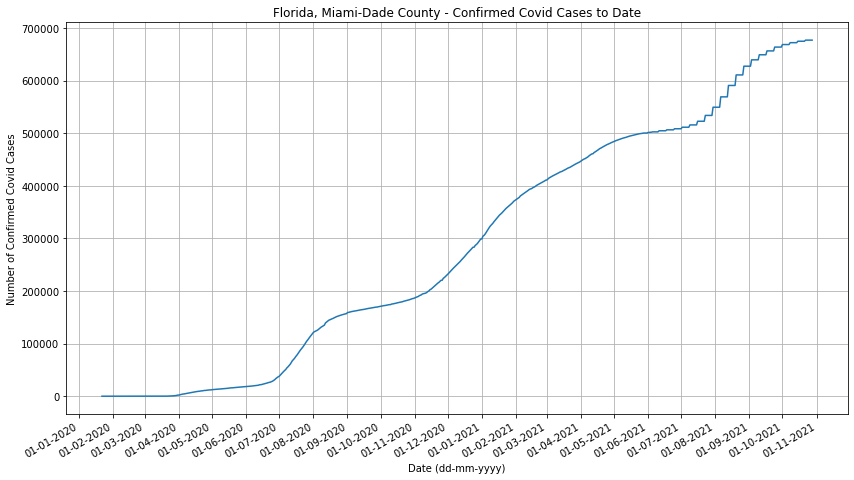

In [16]:
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.lineplot(x = 'Date', y = 'cases', data = miami_cases2)
#ax.set_xticklabels(ax.get_xticks(), rotation = 45)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()
plt.grid()

ax.set_title("Florida, Miami-Dade County - Confirmed Covid Cases to Date")
ax.set_xlabel("Date (dd-mm-yyyy)")
ax.set_ylabel("Number of Confirmed Covid Cases")

### Next, we create a column calculating the differences between each days' case reporting so that we can have new cases each day. We also create a 7 day rolling average for the new cases.

In [17]:
miami_cases2['NewCases'] = miami_cases2['cases'].diff()
miami_cases2['7dayAvg'] = miami_cases2['NewCases'].rolling(7).mean()

### Graph for new cases of COVID

Text(0, 0.5, 'Number of New Covid Cases')

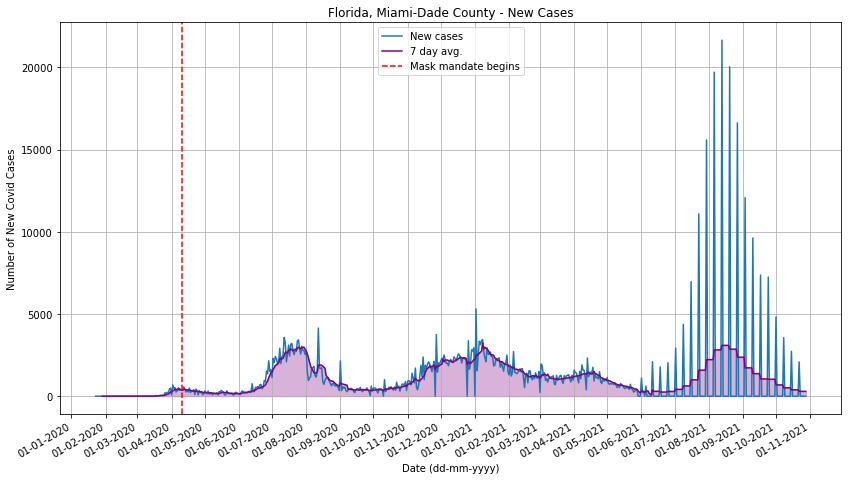

In [18]:
fig, ax = plt.subplots(figsize=(14,8))
line1 = sns.lineplot(x = 'Date', y = 'NewCases', data = miami_cases2)
line2 = sns.lineplot(x = 'Date', y = '7dayAvg', data = miami_cases2, color = 'purple')
#ax.set_xticklabels(ax.get_xticks(), rotation = 45)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()
plt.grid()

l2 = ax.lines[1]

# Get the xy data from the lines so that we can shade
l3 = plt.axvline(18362., color = 'r', linestyle = 'dashed')

x2 = l2.get_xydata()[:,0]
y2 = l2.get_xydata()[:,1]
ax.fill_between(x2,y2, color="purple", alpha=0.3)

ax.legend(('New cases', '7 day avg.', 'Mask mandate begins'))

ax.set_title("Florida, Miami-Dade County - New Cases")
ax.set_xlabel("Date (dd-mm-yyyy)")
ax.set_ylabel("Number of New Covid Cases")

#### Notice the strange behavior starting around July 2021. Looking closer at the data we see that this is because the reporting tactics changed and now the numbers for the week are combined and reported on Friday. The 7 day average represents the reality a little better. 

### Converting date to weekday name so that we can create barplots of avg new covid cases for each day. Which we see directly below

In [19]:
miami_cases2['day_of_week'] = miami_cases2['Date'].dt.day_name()

Text(0, 0.5, 'New Covid Cases')

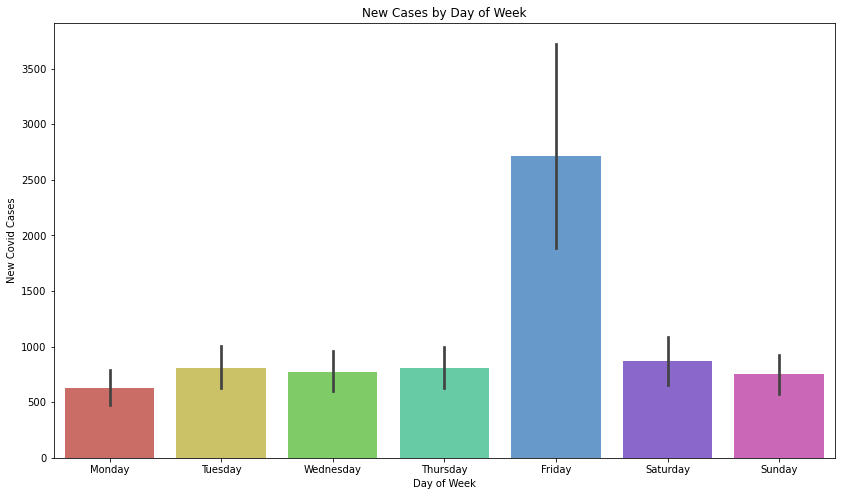

In [20]:
fig, ax = plt.subplots(figsize=(14,8))

bars = sns.barplot(x = 'day_of_week', y = 'NewCases', data = miami_cases2, palette = sns.color_palette("hls", 7),
                   order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax.set_title('New Cases by Day of Week')
ax.set_xlabel("Day of Week")
ax.set_ylabel("New Covid Cases")

### Next we remove the data past the time when the reporting style changed so that our numbers are not skewed to inflate Friday as the day with the most COVID cases. Once this happens we see a much more realistic situation. 

Text(0, 0.5, 'New Covid Cases')

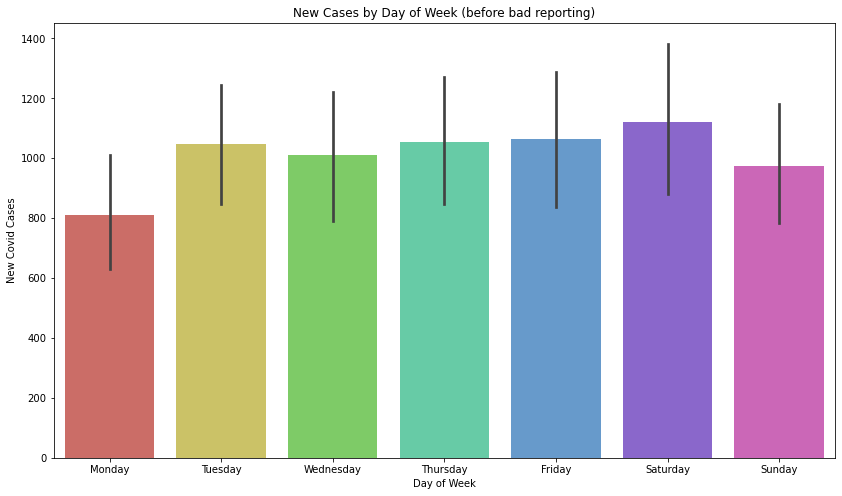

In [21]:
fig, ax = plt.subplots(figsize=(14,8))
bars = sns.barplot(x = 'day_of_week', y = 'NewCases', data = miami_cases2.loc[miami_cases2['Date'] <= '2021-06-01'], 
                   palette = sns.color_palette("hls", 7),
                  order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax.set_title('New Cases by Day of Week (before bad reporting)')
ax.set_xlabel("Day of Week")
ax.set_ylabel("New Covid Cases")

### Trying to adjust the terrible reporting that happens after July 8th, 2021. Gives us a slightly closer view of whats going on

In [22]:
for i in range(507 ,miami_cases2.shape[0]):
      
    if miami_cases2.iloc[i,4] != 0.0:
        weekCase = miami_cases2.iloc[i,4]
        avg = weekCase/7
        
        for j in range(7):
            miami_cases2.iloc[i-j,4] = avg

#miami_cases2['NewCases'] = miami_cases2['NewCases'].rolling(7).mean()

### Below are some ermergency orders in Miami-Dade county that pretain to COVID. This includes both restrictions (mask mandates) as well as loosening of restrictions (opening restraunts, etc), which was found manually on miami-dade county website. 

In [23]:
# All restrictions can be found here: https://www.miamidade.gov/global/initiatives/coronavirus/emergency-orders.page
## (Masks required indoors pretty much the whole time throughout this time period; curfew for most of this time as well)

# "Miami-Dade County has had a mask mandate in place since April 2020 but has not been able to enforce it with 
# fines since September because of restrictions imposed by Florida Gov. Ron DeSantis."

## Tighter Restrictions

### https://www.miamidade.gov/global/initiatives/coronavirus/emergency-orders/emergency-order-20-20.page
### April 9, 2020. (mask mandate)

### https://www.miamidade.gov/global/initiatives/coronavirus/emergency-orders/emergency-order-20-20-amendment-1.page
### July 2, 2020 (mask mandate 2)

### https://www.miamidade.gov/global/initiatives/coronavirus/emergency-orders/emergency-order-26-20-amendment-2.page
### July 9, 2020  (closing (a) movie theaters, (b) concert houses, (c) auditoriums, etc. only outdoor dining,facemask in gym)

## Looser Restrictions

### https://www.miamidade.gov/global/initiatives/coronavirus/emergency-orders/emergency-order-23-20.page
### May 18, 2020 (places reopen except bars, theaters, pools, etc.)

### https://www.miamidade.gov/global/initiatives/coronavirus/emergency-orders/emergency-order-23-20-amendment-1.page
### June 1, 2020 (reopen beaches, pools, etc. Update mask mandate[no need for covering while eating])

### https://www.miamidade.gov/global/initiatives/coronavirus/emergency-orders/emergency-order-23-20-amendment-2.page
### June 8, 2020 (reopen banquet halls, gyms, summer camps, etc)

### https://www.miamidade.gov/global/initiatives/coronavirus/emergency-orders/emergency-order-28-20.page
### August 31, 2020 (indoor dining 50% capacity, casinos reopen)

### https://www.miamidade.gov/global/initiatives/coronavirus/emergency-orders/emergency-order-28-20-amendment-1.page
### September 18, 2020 (opening arcades, bowling alleys, etc)

### https://www.miamidade.gov/global/initiatives/coronavirus/emergency-orders/emergency-order-29-20-amendment-2.page
### October 1, 2020 (no masks for team sports)

### https://www.miamidade.gov/global/initiatives/coronavirus/emergency-orders/emergency-order-33-20.page
### April 6, 2021 (most places open, providing they follow guidelines for covid)

### Basically, this new graph is a zoomed in version of the previous time-series 

Text(0, 0.5, 'Number of New Covid Cases')

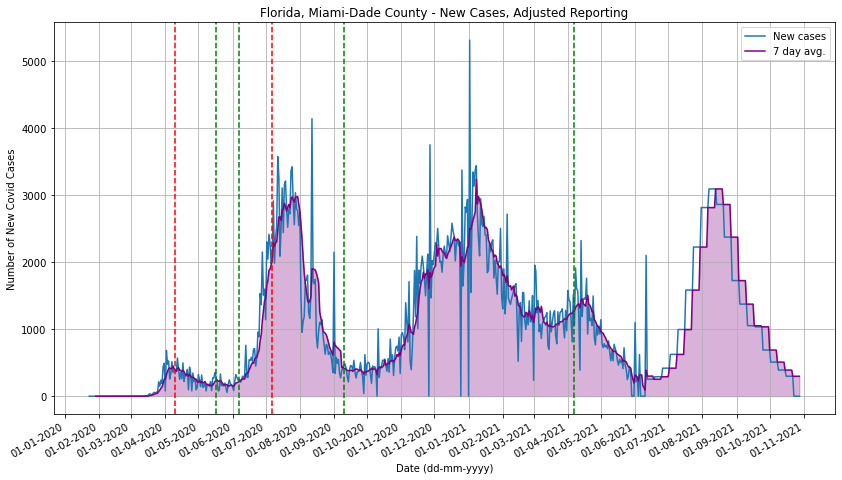

In [24]:
fig, ax = plt.subplots(figsize=(14,8))
line1 = sns.lineplot(x = 'Date', y = 'NewCases', data = miami_cases2)
line2 = sns.lineplot(x = 'Date', y = '7dayAvg', data = miami_cases2, color = 'purple')
#ax.set_xticklabels(ax.get_xticks(), rotation = 45)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()
plt.grid()

l2 = ax.lines[1]

# Get the xy data from the lines so that we can shade

x2 = l2.get_xydata()[:,0]
y2 = l2.get_xydata()[:,1]
ax.fill_between(x2,y2, color="purple", alpha=0.3)

############# Tight Restrictions
plt.axvline(18362., color = 'r', linestyle = 'dashed')
plt.axvline(18450., color = 'r', linestyle = 'dashed')

############# Looser Restrictions
plt.axvline(18399., color = 'g', linestyle = 'dashed')
plt.axvline(18420., color = 'g', linestyle = 'dashed')
plt.axvline(18515., color = 'g', linestyle = 'dashed')
plt.axvline(18724., color = 'g', linestyle = 'dashed')

#############
ax.legend(('New cases', '7 day avg.'))

ax.set_title("Florida, Miami-Dade County - New Cases, Adjusted Reporting")
ax.set_xlabel("Date (dd-mm-yyyy)")
ax.set_ylabel("Number of New Covid Cases")

The graph above shows the amount of new COVID cases every day and also has the 7 day moving average. I also had to find other sources for mask mandates so I was using the county website. Since the mask mandate did not end in my county I decided to look at how retrictions affected the new cases/spread of COVID. We can see red and green vertical dashed lines which represent different COVID restrictions being tightened and loosened, respectively. The blue line is the new number of covid cases per day while the purple line represents the 7 day rolling average of the covid cases. We can see right after the first restriction, which corresponds to a mask mandate on April 9th, 2020 as well as shutting down restraunts and similar buisnesses in most cases, the number of cases started to trend downwards. Next, we see a loosening of mask mandates within a month of each other around late May/early June, the first of which reopened (outdoor restruant seating) most places except bars, movie theaters, etc. while the second one reopened beaches, gyms, etc. and updated the mask policy to where you can remove it while eating. The first one seemed to cause a minor downwards trend in cases which then started leading upwards, while the second one seems to be right before a very sharp uptick in cases. As the cases were climbing an ammendment was made to the mas mandate and some restrictions were added onto restraunts and public places again. right after these restrictions, we see it continues to grow for about a month before falling sharply. Next, another lifting of restrictions which finally opened the least necessary places like bowling alleys, arcades, and also allowed no masks for team sports. This is followed by a lowering of cases for a little over a month before the cases shot up again. But then in early January of 2021 they started to fall slowly without any greater restrictions placed upon the county. Finally, we have the last loosening of restrictions which allowed everything to open almost fully, provided they still follow the COVID protocols (hand sanitizer everywhere, open windows, etc.). Which seems to lower the case counts overall for a long time before they rise and fall again with seemingly no other factors.  

I would like to point out that pretty much the whole time between April 9, 2020 and now, there has been a mask mandate for most public spaces in the county. At no point during this period was it okay to be indoors in a public place without a mask (unless eating, smoking, medical reason, etc.). I was able to obtain this information manually just from reading the county's website and looking at the different emergency orders that were in place. This makes it difficult to answer the question of whether masking policies are effective at preventing COVID because there are rises in COVID cases and falls in COVID cases all while the masking mandate is still in effect. Something interesting to consider is that the state of Florida does not have a mask mandate currently and that might contibute to the wild fluctuations we see as people from outside the county come to visit. Considering how many variables go into the delay of getting COVID and it being reported it seems to be somewhat pointless to try to model that accurately with just the given data. The mask survey data seems to be difficult to use because it was only conducted for about 2 weeks in July. While it can be used to understand the general sentiment of the county, the one data point means it would probably be a bad idea to apply it across the whole cases data. This data would be very useful if we could see how the attitudes towards masking changed throughout the course of the pandemic (the longer the lockdowns, the more poeple dont enjoy masks and want to return to normal , etc.) If we had multiple mask compliance data points then perhaps we could interpolate some function between the points and see how the changes in mask complaince data effected the COVID infection rates. That would probably be the most useful as we could guess when people were 'masked' but wearing it below their nose, etc. 

I did not really communicate much with other poeple or use their code for this part of the project. I know some people also had little mask data but I was able to see that a mask mandate did exist for miami-dade; I just had to find the data elsewhere. If my county had no mask mandates whatsoever then it would be easier to utilize the mask compliance data since even without a mandate we could assume that x% of the population wore masks always. But seeing as how my particular county never let go of the mask mandate we cannot utilize that data as readily. I am also concerned about Miami's reporting of the COVID infections after June 2021. The data looks very nicely/normally distributed which is casuing some concern as to the validity of the numbers for me. And what was the reasoning for changing the updates from once a day to once a week? That seems to be very useless and I cannot think of a good reason for it; especially because hospitals were required to give information on COVID patients daily (which I found throught the research of the emergency orders). I got the idea to create a bar graph with the days of the week from Andrew and from there I was interested in looking at concrete ways to see the effect of masking. Again having the mask compliance data as one data point was not very useful because we can't assume that 'always masking' leads to less cases by that portion of the community. Overall, I feel this question has no clear answer from the data provided. It appears that everytime restrictions tightened, there was a decrease in cases, but at the same time, the cases could go down and the sharply up with no changes in restrictions on masking. Of course Miami is known as a 'party' city and perhaps this contributed to the increase in cases since people might be without masks when it is legally required. It is difficult to tell from the data given. But again, it is important to note that Miami-Dade county seems to have had the mask mandate continuously from April 9th, 2020. With that in mind we have very little data about the spread of COVID without masks and are not able to tell with certainty if there was any difference made by the mask mandates. 

## Below is some extra pre-analysis for A5, A6

### Here we graph the new covid cases daily but adjusted to zoom in the graph once the faulty reporting started in June 2021. Also pictured here is the 7 day average for covid cases

Text(0, 0.5, 'Number of New Covid Cases')

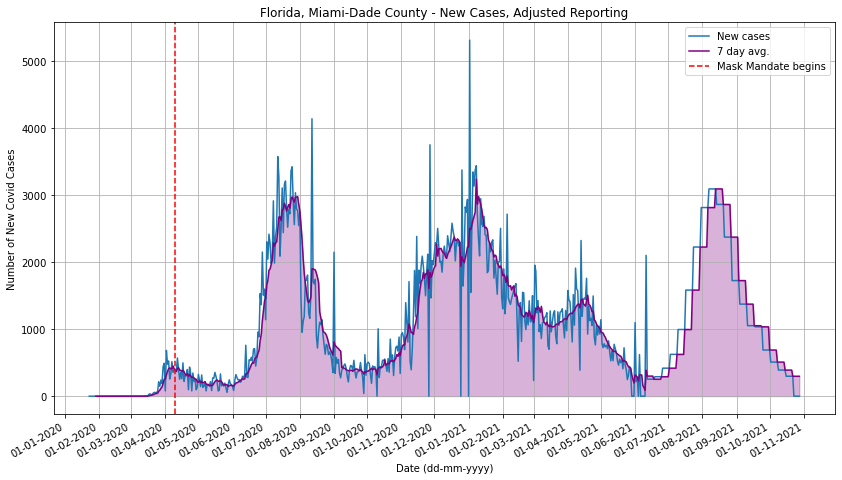

In [25]:
fig, ax = plt.subplots(figsize=(14,8))
line1 = sns.lineplot(x = 'Date', y = 'NewCases', data = miami_cases2)
line2 = sns.lineplot(x = 'Date', y = '7dayAvg', data = miami_cases2, color = 'purple')
#ax.set_xticklabels(ax.get_xticks(), rotation = 45)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()
plt.grid()

l2 = ax.lines[1]

# Get the xy data from the lines so that we can shade

x2 = l2.get_xydata()[:,0]
y2 = l2.get_xydata()[:,1]
ax.fill_between(x2,y2, color="purple", alpha=0.3)

############# Tight Restrictions
l3 = plt.axvline(18362., color = 'r', linestyle = 'dashed')

#############
ax.legend(('New cases', '7 day avg.', 'Mask Mandate begins'))

ax.set_title("Florida, Miami-Dade County - New Cases, Adjusted Reporting")
ax.set_xlabel("Date (dd-mm-yyyy)")
ax.set_ylabel("Number of New Covid Cases")

In [26]:
miami_cases2['derivDiff'] = miami_cases2['NewCases'].diff()

### Rate of change of new cases graph: how quickly the number of covid cases are changing and in which direction.

Text(0, 0.5, "'Speed' of New Covid Cases")

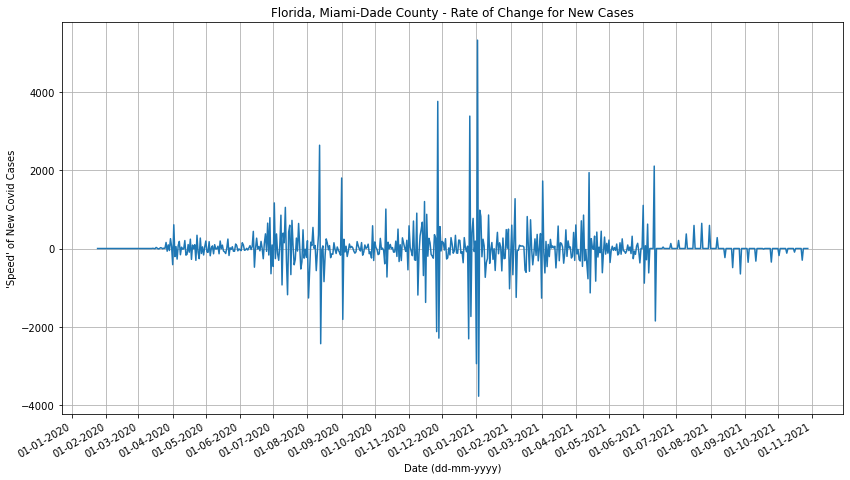

In [27]:
fig, ax = plt.subplots(figsize=(14,8))
line1 = sns.lineplot(x = 'Date', y = 'derivDiff', data = miami_cases2)
#line2 = sns.lineplot(x = 'Date', y = '7dayAvg', data = miami_cases2, color = 'purple')
#ax.set_xticklabels(ax.get_xticks(), rotation = 45)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()
plt.grid()

#l2 = ax.lines[1]

# Get the xy data from the lines so that we can shade

# x2 = l2.get_xydata()[:,0]
# y2 = l2.get_xydata()[:,1]
# ax.fill_between(x2,y2, color="purple", alpha=0.3)

#############
#ax.legend(('New cases', '7 day avg.'))

ax.set_title("Florida, Miami-Dade County - Rate of Change for New Cases")
ax.set_xlabel("Date (dd-mm-yyyy)")
ax.set_ylabel("'Speed' of New Covid Cases")

### Here we calculate values that tell us what the 7 day rolling average and will use the to plot infection rate which is useful because it is on a scale from 0 to 100%

In [28]:
miami_cases2['7daySum'] = miami_cases2['NewCases'].rolling(7).sum()
miami_cases2['7daySum'] = (miami_cases2['7daySum'] * 10000 )/2701767

### Plotting Covid Infection rate with a 7 day delay of infection.

Text(0, 0.5, 'Infection Rate of New Covid Cases')

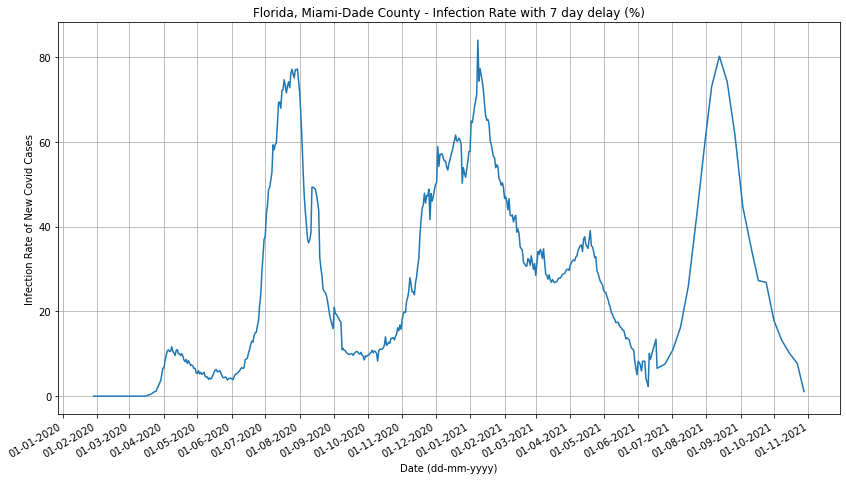

In [29]:
fig, ax = plt.subplots(figsize=(14,8))
line1 = sns.lineplot(x = 'Date', y = '7daySum', data = miami_cases2)
#line2 = sns.lineplot(x = 'Date', y = '7dayAvg', data = miami_cases2, color = 'purple')
#ax.set_xticklabels(ax.get_xticks(), rotation = 45)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()
plt.grid()



ax.set_title("Florida, Miami-Dade County - Infection Rate with 7 day delay (%)")
ax.set_xlabel("Date (dd-mm-yyyy)")
ax.set_ylabel("Infection Rate of New Covid Cases")